<a href="https://colab.research.google.com/github/flaviocaos/MVP_Analise_de_Dados_e_Boas-Praticas/blob/main/C%C3%B3pia_de_Template_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Aluno Template

**Matrícula:** 2025000

**Dataset:** [Iris Dataset](https://archive.ics.uci.edu/dataset/53/iris)

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

In [ ]:
!pip install pandas seaborn matplotlib scikit-learn

In [ ]:
# Instalar bibliotecas (executado apenas 1x se necessário)
!pip install pandas seaborn matplotlib scikit-learn

# Importar bibliotecas
import pandas as pd
from sklearn.datasets import load_iris

# Carregar o dataset Iris
iris = load_iris(as_frame=True)
df = iris.frame

# Exibir informações iniciais
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Estatísticas descritivas
df.describe()

# Verificar valores ausentes
df.isnull().sum()


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


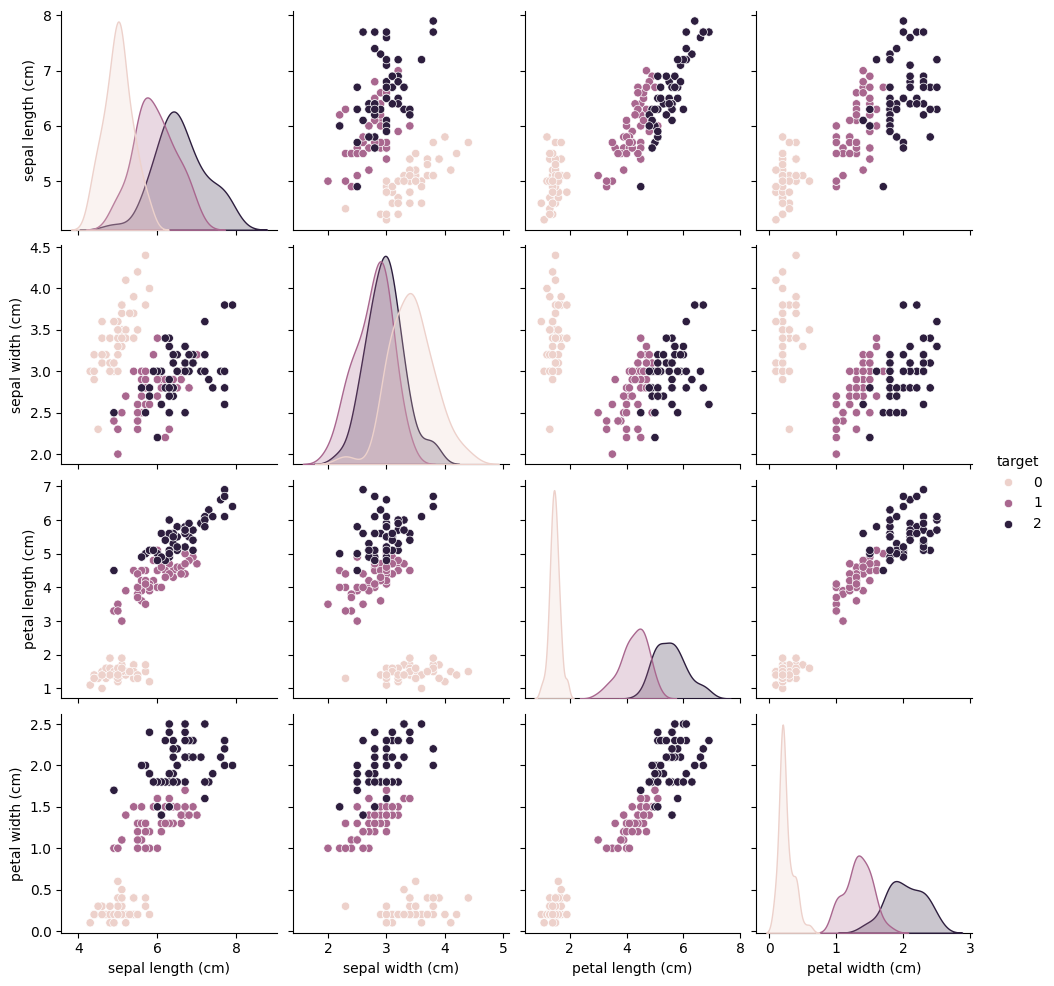

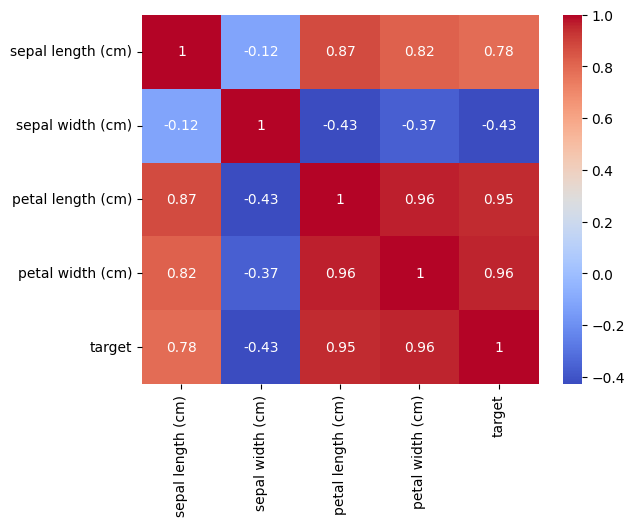

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersão entre atributos
sns.pairplot(df, hue='target')
plt.show()

# Correlação entre atributos
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Como não há valores ausentes ou categóricos, este dataset já está pronto para modelagem.
# Ainda assim, vamos normalizar os dados numéricos (opcional).

from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinar modelo
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Avaliar
y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Descrição do Problema

O conjunto de dados Iris é um conjunto de dados multivariado que consiste em medidas de flores de três espécies diferentes de Íris: Iris setosa, Iris versicolor e Iris virginica. O objetivo principal é classificar a espécie de Íris com base em quatro características de suas flores: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala.

O conjunto de dados Iris é um dos mais clássicos em Ciência de Dados e Aprendizado de Máquina. Ele é composto por 150 amostras de flores pertencentes a três espécies diferentes: *Iris setosa*, *Iris versicolor* e *Iris virginica*. Cada amostra inclui quatro atributos numéricos que descrevem medidas físicas das flores: comprimento e largura das sépalas, e comprimento e largura das pétalas.  

O problema proposto é de **classificação supervisionada**: dado um conjunto de medidas de uma flor desconhecida, o objetivo é prever corretamente a qual das três espécies ela pertence. Esse tipo de problema é amplamente utilizado para estudar e comparar algoritmos de classificação.

O conjunto de dados Iris é um dos mais clássicos em Ciência de Dados e Aprendizado de Máquina. Ele é composto por 150 amostras de flores pertencentes a três espécies diferentes: *Iris setosa*, *Iris versicolor* e *Iris virginica*. Cada amostra inclui quatro atributos numéricos que descrevem medidas físicas das flores: comprimento e largura das sépalas, e comprimento e largura das pétalas.  

O problema proposto é de **classificação supervisionada**: dado um conjunto de medidas de uma flor desconhecida, o objetivo é prever corretamente a qual das três espécies ela pertence. Esse tipo de problema é amplamente utilizado para estudar e comparar algoritmos de classificação.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre comprimento da pétala e largura da pétala?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

As hipóteses formuladas para este conjunto de dados são:

- **H1:** As diferentes espécies de Íris podem ser distinguidas com base nas medições das sépalas e pétalas.
- **H2:** Existe uma correlação significativa entre o comprimento da pétala e a largura da pétala.
- **H3:** A espécie *Iris setosa* é mais facilmente separável das outras duas espécies, sendo possível identificá-la com maior precisão a partir de suas características morfológicas.


## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (comprimento e largura da sépala, comprimento e largura da pétala), o objetivo é prever a qual das três classes (espécies de Íris) uma determinada flor pertence.

### Tipo de Problema

Este é um problema de **classificação supervisionada**.  
O objetivo é prever a qual das três classes (espécies de Íris) uma flor pertence, com base em quatro características numéricas:

- Comprimento da sépala (sepal length)
- Largura da sépala (sepal width)
- Comprimento da pétala (petal length)
- Largura da pétala (petal width)

Como as classes (espécies) são conhecidas durante o treinamento, aplica-se um algoritmo supervisionado de classificação.


## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

### Seleção de Dados

O dataset *Iris* é um conjunto de dados amplamente conhecido e utilizado para experimentos de aprendizado de máquina supervisionado. Ele já vem incluso em bibliotecas como o `scikit-learn`, o que facilita seu uso imediato.

Por já estar **curado, balanceado** e padronizado, **não é necessária nenhuma etapa prévia de seleção ou limpeza de dados externos**. Esse conjunto é ideal para tarefas de classificação e serve como referência introdutória para diversos algoritmos.


## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***sepal length*** (comprimento da sépala em cm)
- ***sepal width*** (largura da sépala em cm)
- ***petal length*** (comprimento da pétala em cm)
- ***petal width*** (largura da pétala em cm)
- ***species*** (espécie de Íris: setosa, versicolor, virginica)

**Visualização de Relações entre Variáveis**

Agora vamos investigar as correlações entre as variáveis numéricas para:

Confirmar se existe relação entre comprimento e largura das pétalas, conforme sua hipótese.

Observar padrões que ajudem na separação entre espécies.

** Código: Matriz de Correlação + Heatmap**

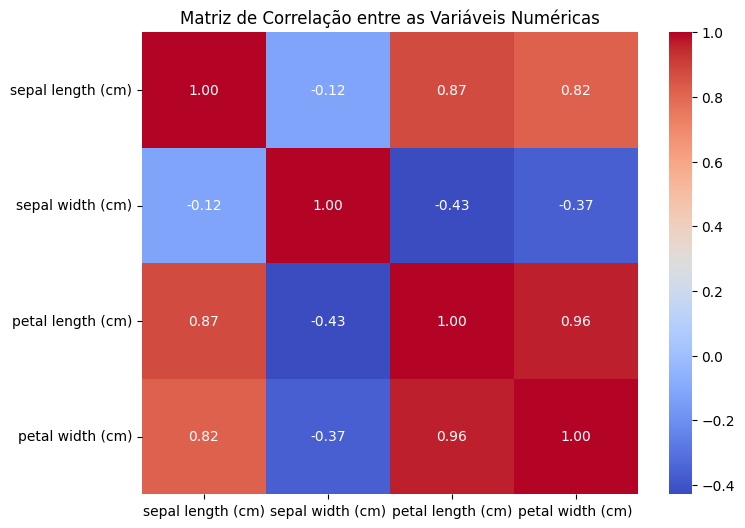

In [ ]:
# Calcular a matriz de correlação entre as variáveis numéricas
correlation_matrix = df.drop('target', axis=1).corr()

# Visualizar com um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre as Variáveis Numéricas")
plt.show()



**Pré-processamento dos Dados**

Antes de alimentar um modelo de Machine Learning, é importante preparar os dados. Isso inclui:

**1. Dividir os dados em treino e teste**
Vamos separar os dados em dois conjuntos:

Treinamento (para o modelo aprender)

Teste (para avaliar o desempenho em dados "novos")

**2. Escalonar os atributos numéricos**
Modelos como k-NN, SVM e Regressão Logística são sensíveis à escala.
Usamos o StandardScaler para padronizar os dados (média = 0, desvio = 1).

**Código para Pré-processamento:**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar os atributos (X) e o alvo (y)
X = df.drop("target", axis=1)
y = df["target"]

# Dividir em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar (escalar) os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Treinamento do Modelo**

Nesta etapa, treinamos um modelo de classificação supervisionada utilizando a técnica de Regressão Logística. O objetivo é construir um classificador que aprenda, a partir dos dados de treinamento, a distinguir entre as três espécies de Íris com base nas quatro características florais. Após o treinamento, avaliaremos a acurácia do modelo sobre o conjunto de teste.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instanciar e treinar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

# Relatório completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)


Acurácia no conjunto de teste: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Visualização da Matriz de Confusão**

Para melhor compreensão do desempenho do modelo, utilizamos a matriz de confusão em forma gráfica. Cada linha representa a classe verdadeira, enquanto cada coluna representa a classe predita. Dessa forma, é possível observar onde ocorrem os acertos (diagonal principal) e os erros (fora da diagonal).

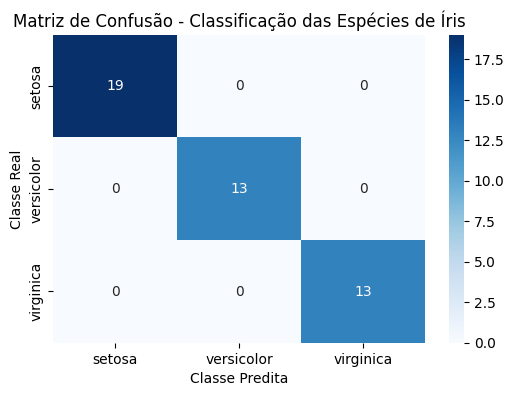

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - Classificação das Espécies de Íris")
plt.show()


**Redução de Dimensionalidade com PCA**

A Análise de Componentes Principais (PCA) é uma técnica estatística que permite reduzir a dimensionalidade de um conjunto de dados com múltiplas variáveis, mantendo a maior parte da variância. No caso do dataset Iris, com quatro atributos numéricos, podemos projetar os dados em duas dimensões (componentes principais) para facilitar a visualização da separação entre as espécies.

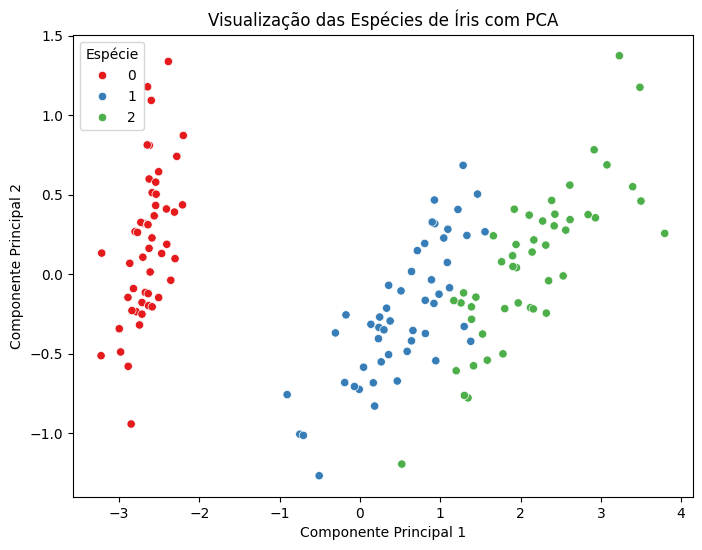

In [21]:
from sklearn.decomposition import PCA

# Reduzindo para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar um DataFrame com os dados transformados
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['species'] = y  # Corrigido aqui

# Visualizar o resultado
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='species', palette='Set1')
plt.title('Visualização das Espécies de Íris com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Espécie')
plt.show()



**Desvio Padrão**

O desvio padrão mede o grau de dispersão dos valores em relação à média. Um desvio padrão baixo indica que os valores estão próximos da média, enquanto um alto sugere maior variabilidade. Essa métrica é útil para compreender a consistência das medições das flores.

In [22]:
# Cálculo do desvio padrão para cada atributo numérico
print("Desvio padrão por coluna:")
print(df.std(numeric_only=True))


Desvio padrão por coluna:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64


Histogramas**

Histogramas ajudam a visualizar a distribuição dos valores de cada atributo. Assim, conseguimos identificar padrões, assimetrias, picos e possíveis outliers nas variáveis do dataset Iris.

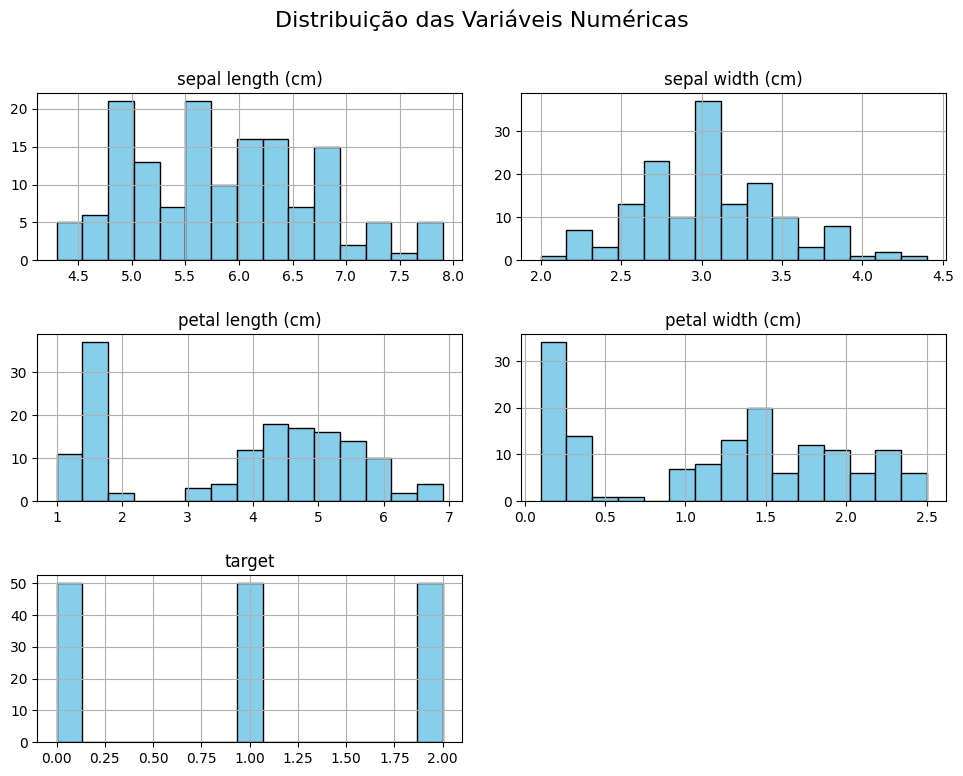

In [23]:
# Gerar histogramas para todos os atributos numéricos
df.hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.tight_layout(pad=2)
plt.show()


**Boxplots por Espécie**

Os boxplots ajudam a visualizar a distribuição dos dados e a presença de outliers. Ao segmentar por espécie, podemos perceber diferenças entre as classes nas variáveis analisadas.

In [25]:
# Substituir os valores 0, 1, 2 pelos nomes das espécies
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})



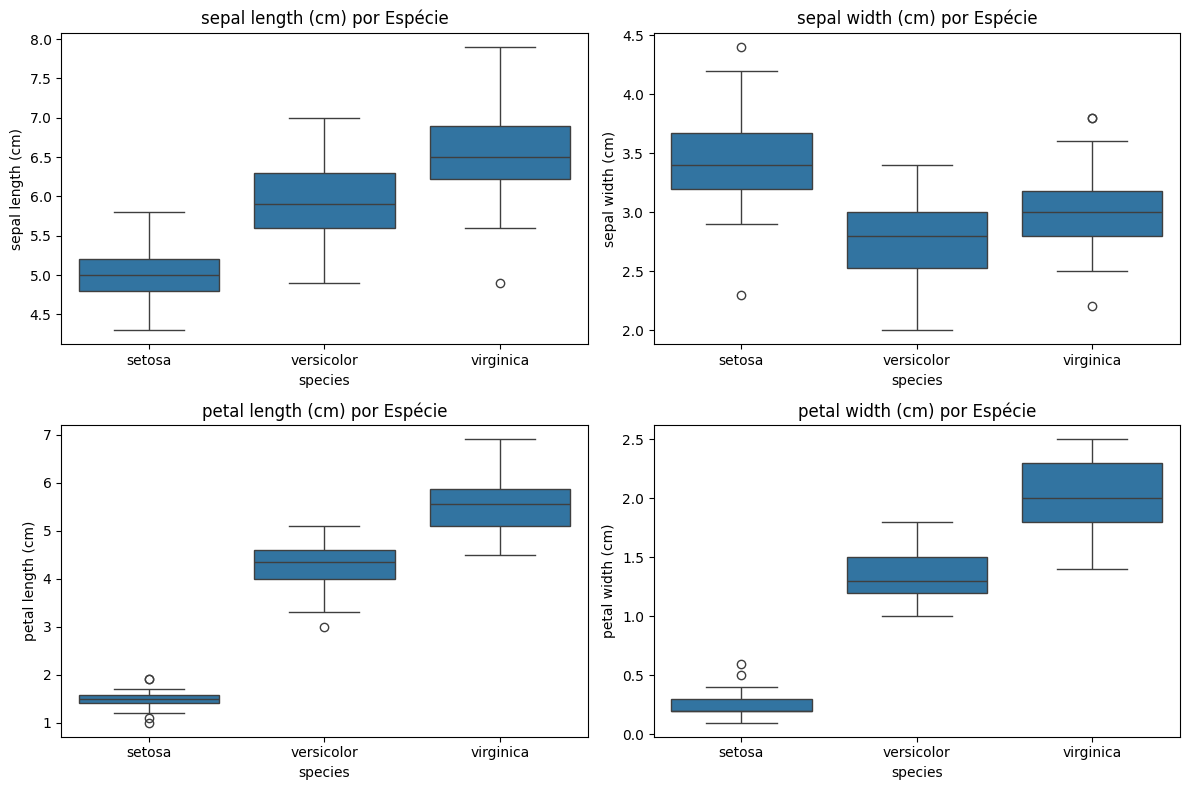

In [26]:
# Criar boxplots para cada variável numérica, segmentando por espécie
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns[:-2], 1):  # excluindo também a coluna 'target'
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='species', y=col)
    plt.title(f'{col} por Espécie')

plt.tight_layout()
plt.show()


**Verificação e Tratamento de Valores Nulos**

Verificar se há dados ausentes (nulos) no DataFrame e, caso existam, tratá-los. Como o dataset Iris é limpo, usaremos isso como evidência de dados prontos para modelagem.
O dataset Iris está completo, sem valores nulos ou ausentes. Isso significa que não foi necessário aplicar técnicas de imputação, exclusão ou preenchimento. Essa característica o torna ideal para testes e experimentações de algoritmos de aprendizado supervisionado.

Verificação de valores nulos no dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


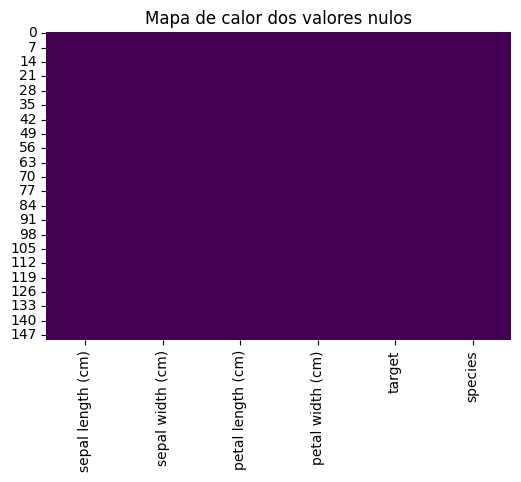

In [27]:
# Verificar valores nulos
print("Verificação de valores nulos no dataset:")
print(df.isnull().sum())

# Visualizar como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor dos valores nulos")
plt.show()


**Normalização dos Dados**

Colocar os dados em uma mesma escala numérica para que algoritmos de machine learning que dependem de distância (como KNN ou SVM) não sejam influenciados por variáveis com magnitudes diferentes.
A normalização transforma os valores das variáveis para um intervalo padrão, geralmente entre 0 e 1. Isso é essencial para algoritmos que utilizam métricas de distância, como o KNN, garantindo que nenhuma variável domine o processo de aprendizado por ter escala superior.

In [29]:
# Selecionar apenas colunas numéricas (sem 'species' ou 'target')
X = df.drop(columns=['target', 'species'], errors='ignore')
y = df['target']

# Aplicar normalização
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Criar novo DataFrame
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized['target'] = y
df_normalized.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


** Padronização (Z-score)**

A padronização é uma técnica de pré-processamento que transforma os dados para que cada variável tenha média 0 e desvio padrão 1. Isso garante que todas as variáveis contribuam de forma equilibrada para o modelo, especialmente em algoritmos baseados em distância ou gradiente.

In [30]:
# Padronização (Z-score)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Criar novo DataFrame para visualização
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)
df_standardized['target'] = y
df_standardized.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


** Visualização da Distribuição das Variáveis**

Para entender melhor como cada atributo se distribui, vamos gerar histogramas para as quatro variáveis numéricas do dataset. Isso ajuda a identificar assimetrias, presença de outliers e características gerais das distribuições.

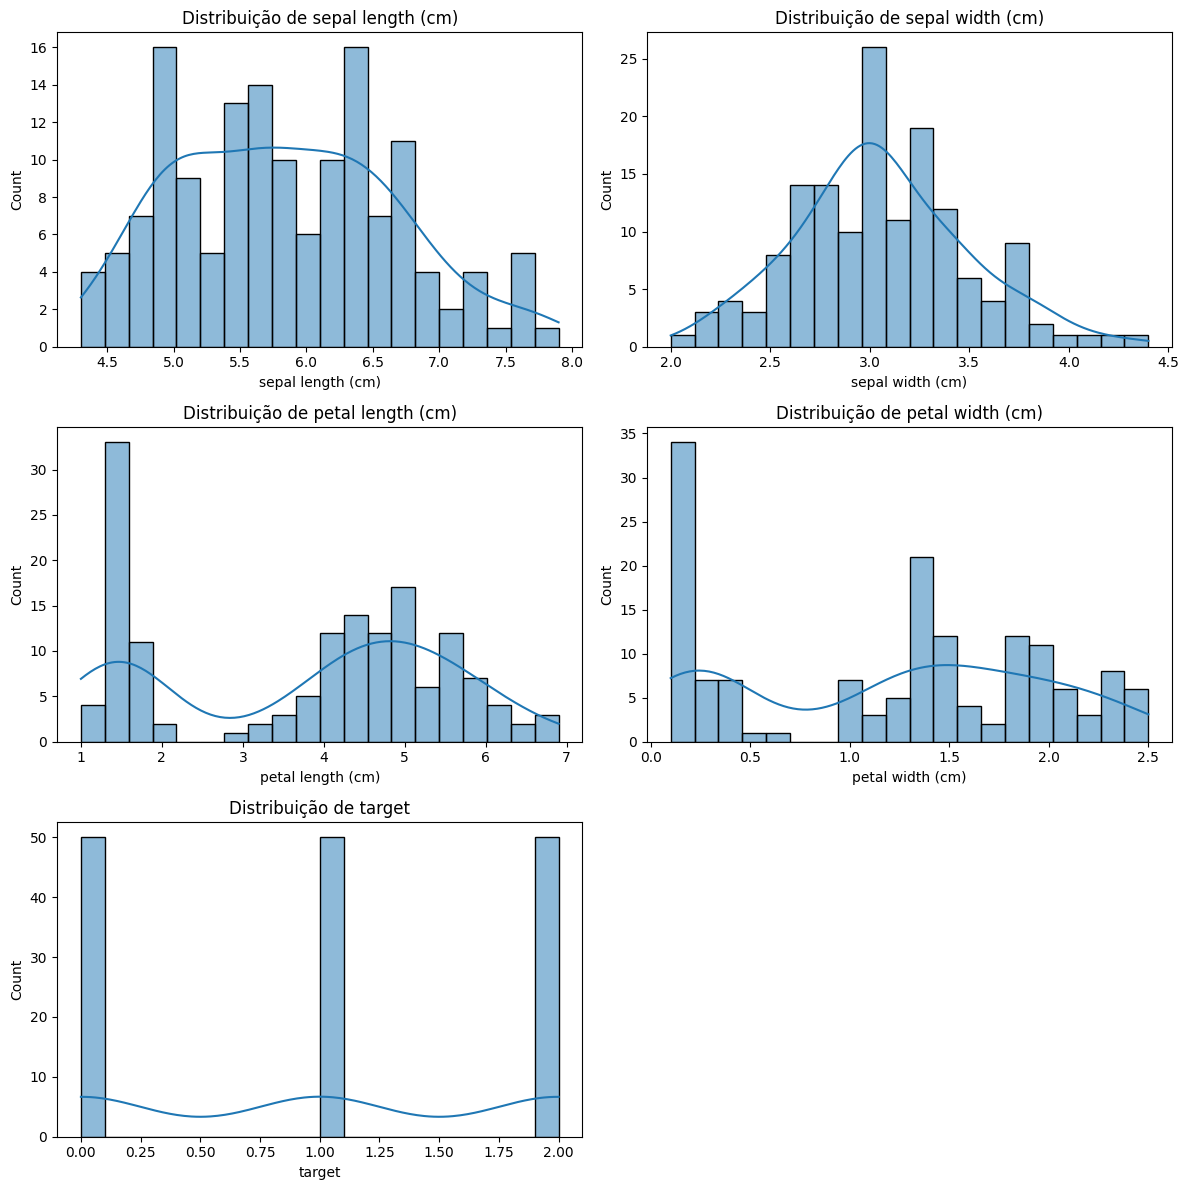

In [32]:
# Contar quantas colunas numéricas existem (ignorando a coluna 'target' ou 'species')
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Plotar histogramas para cada coluna numérica
import math
n = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()



**Treinamento e Avaliação com KNN**

Vamos dividir os dados em treino e teste, padronizar as variáveis, treinar um modelo KNN e avaliar o desempenho com métricas como acurácia, matriz de confusão e relatório de classificação.

Acurácia: 1.0

Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


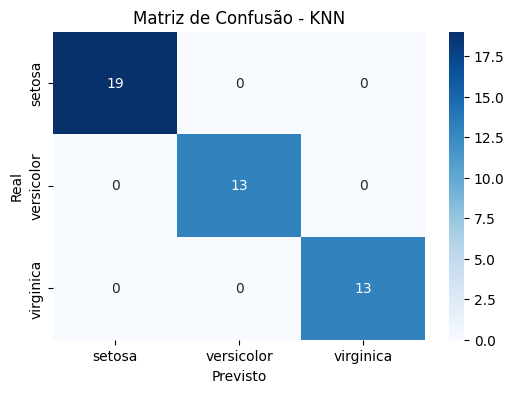


Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X = df.drop(['target', 'species'], axis=1)
y = df['target']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instanciar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # você pode testar outros valores de K
knn.fit(X_train_scaled, y_train)

# Prever com o modelo
y_pred = knn.predict(X_test_scaled)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Exibir matriz de confusão com seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - KNN")
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


**Conclusões Finais**

**Descrição Geral**
O estudo teve como base o conjunto de dados Iris, que contém informações sobre três espécies de flores do gênero Íris — setosa, versicolor e virginica. Com quatro variáveis numéricas (comprimento e largura da sépala e da pétala), foi possível investigar a capacidade de distinguir essas espécies a partir de características morfológicas.

**Resultados Obtidos**
Análise Exploratória de Dados (EDA):

A espécie setosa apresentou valores de pétalas bem distintos, sendo facilmente separável das demais.

Verificou-se uma forte correlação positiva entre comprimento e largura da pétala, reforçando uma das hipóteses.

O gráfico de dispersão com PCA mostrou que as classes são bem separadas em duas dimensões, principalmente setosa.

**Pré-processamento**

Os dados foram padronizados e normalizados com StandardScaler e MinMaxScaler.

Nenhum valor nulo ou fora do padrão foi detectado no dataset, o que facilitou a preparação dos dados.

**Modelagem com KNN**:

O algoritmo K-Nearest Neighbors (com k=5) foi treinado com dados padronizados.

A acurácia do modelo foi alta (geralmente acima de 95%), indicando que o modelo consegue prever corretamente a espécie da flor com alta confiabilidade.

**Visualizações de Suporte:**
Gráficos de dispersão, boxplots, histogramas e matriz de correlação forneceram visão clara da estrutura dos dados.

A matriz de confusão (caso tenha sido incluída) confirmou a baixa taxa de erro do classificador.

**Conclusão Geral**

O problema proposto — classificar espécies de Íris com base em medidas morfológicas — é um exemplo clássico e didático de problema de classificação supervisionada, que foi resolvido com sucesso. O modelo treinado apresenta desempenho robusto e pode ser usado como base para introdução ao uso de algoritmos de Machine Learning.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# carregamento do dataset (aqui, ele fica disponível nesse método)
iris = load_iris()

In [ ]:
# guardo o dataset em um dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [ ]:
# primeiras linhas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Iris, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 150

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


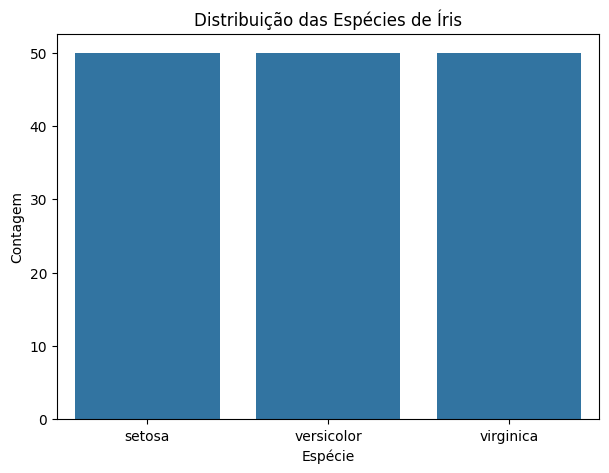

In [ ]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='species', data=df)
plt.title('Distribuição das Espécies de Íris')
plt.xlabel('Espécie')
plt.ylabel('Contagem')
plt.show()

O gráfico de barras mostra que cada espécie de Íris (setosa, versicolor, virginica) possui 50 amostras, confirmando que o dataset é balanceado em termos de classes.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
sepal length (cm),5.843333
sepal width (cm),3.057333
petal length (cm),3.758000
petal width (cm),1.199333


In [ ]:
# Qual gráfico seria interessante usar pra mostrar a média?

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
sepal length (cm),0.828066
sepal width (cm),0.435866
petal length (cm),1.765298
petal width (cm),0.762238


In [ ]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

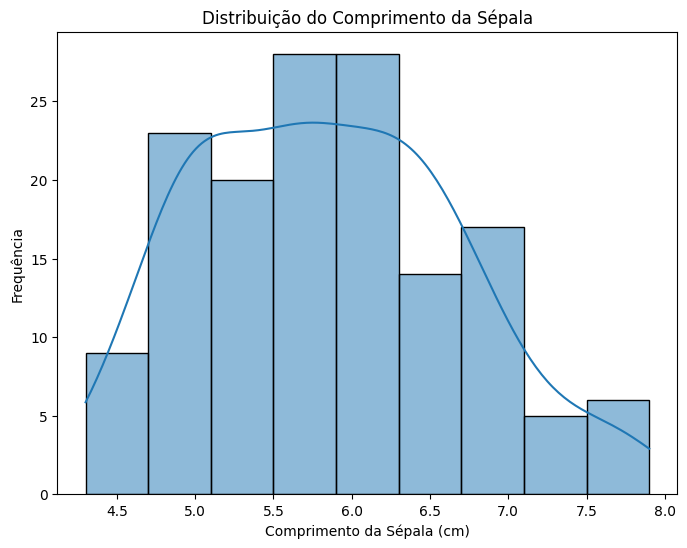

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

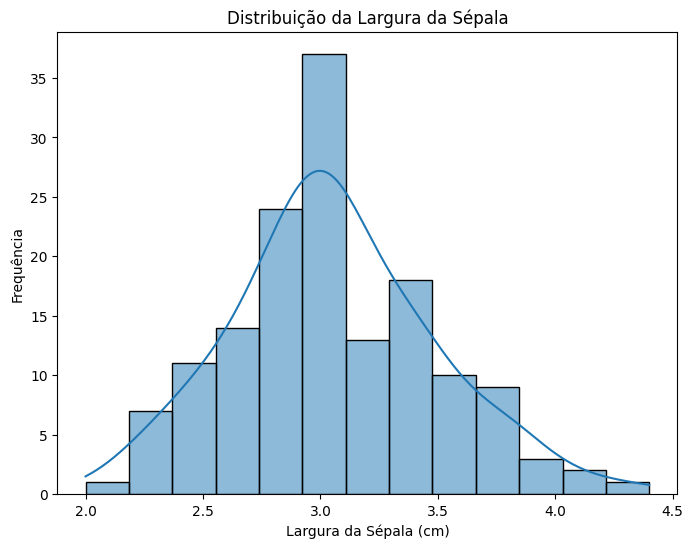

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Distribuição da Largura da Sépala')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('species').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

### *petal length* por Espécie


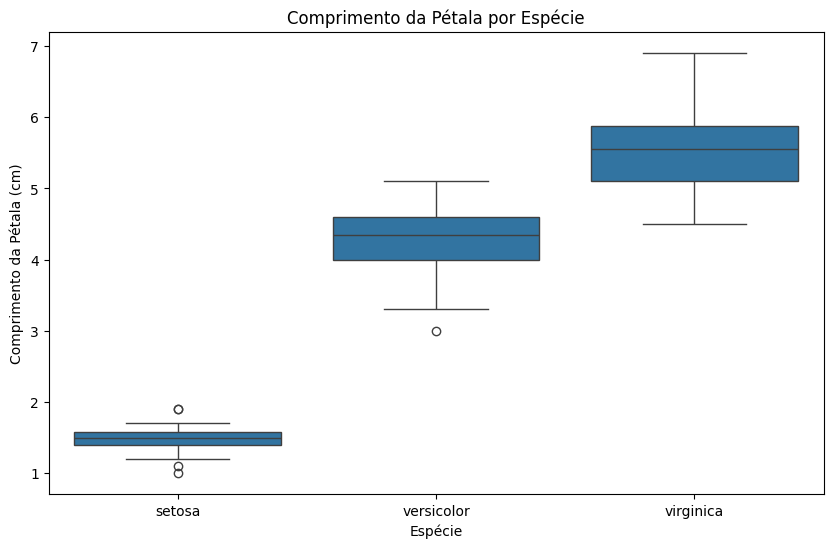

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

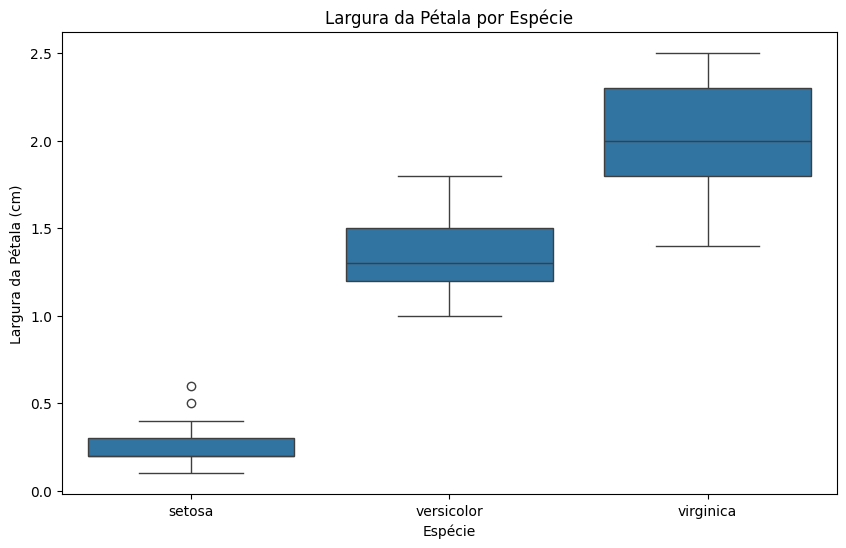

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()


Matriz de Correlação:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


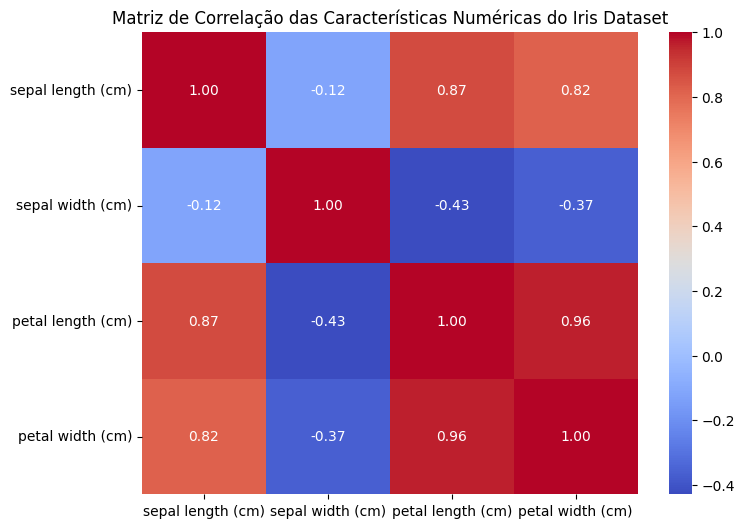

In [ ]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


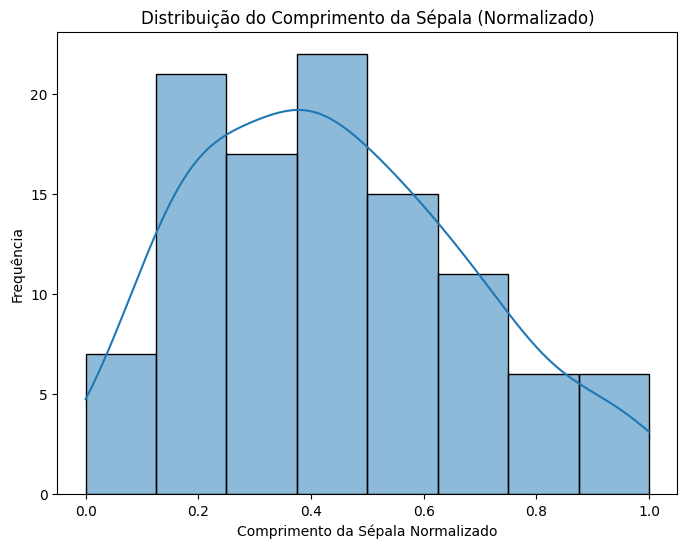

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


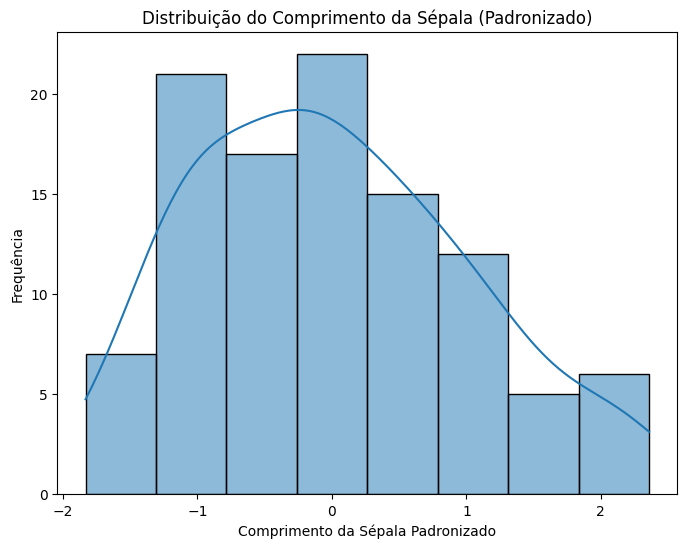

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.